<a href="https://colab.research.google.com/github/m2masari/ML/blob/master/telco_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the data and Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/assesment/Velox')

In [0]:
df = pd.read_csv('Telco_Churn_Case.csv', sep=';')

##### Data Summary

In [0]:
df.head()

,AGE1,CHILDREN,CHURN,MARRYYES,MARRYNO,MARRYUN,INCOME,OCCSTUD,OCCSELF,OCCRET,OCCPROF,OCCHMKR,OCCCRFT,OCCCLER,NEWCELLY,MONTHS,MODELS,PHONES,PCOWN,CALLWAIT,MOU,INCALLS,EQPDAYS,DROPVCE,CUSTOMER,ROAM,REVENUE,RECCHRGE,PEAKVCE,OUTCALLS
0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,22,3.0,3.0,0,2.666667,185.75,0.000000,280.0,2.000000,1033384,0.00,37.5100,27.5725,48.666667,0.000000
1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,25,5.0,7.0,0,102.000000,3294.25,181.666667,51.0,124.000000,1022818,0.00,191.6100,114.1025,800.666667,240.333333
2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,1.0,1.0,0,0.000000,2582.00,1.000000,188.0,9.333333,1095330,22.47,187.7200,122.4925,386.000000,46.666667
3,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,1.0,1.0,0,0.666667,278.75,5.666667,243.0,7.333333,1092012,0.00,54.6325,64.4275,32.666667,24.000000
4,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,1.0,1.0,0,0.000000,260.75,6.333333,243.0,13.666667,1092009,0.00,50.3000,33.7000,33.000000,30.666667


In [0]:
df.columns

Index(['AGE1', 'CHILDREN', 'CHURN', 'MARRYYES', 'MARRYNO', 'MARRYUN', 'INCOME',
       'OCCSTUD', 'OCCSELF', 'OCCRET', 'OCCPROF', 'OCCHMKR', 'OCCCRFT',
       'OCCCLER', 'NEWCELLY', 'MONTHS', 'MODELS', 'PHONES', 'PCOWN',
       'CALLWAIT', 'MOU', 'INCALLS', 'EQPDAYS', 'DROPVCE', 'CUSTOMER', 'ROAM',
       'REVENUE', 'RECCHRGE', 'PEAKVCE', 'OUTCALLS'],
      dtype='object')

In [0]:
df.shape

(71047, 30)

In [0]:
#Droppig unique idntifier column

df.drop('CUSTOMER',axis=1,inplace=True)

##### Checking null counts

In [0]:
df.isnull().sum(axis=0)

AGE1        1244
CHILDREN       0
CHURN          0
MARRYYES       0
MARRYNO        0
MARRYUN        0
INCOME         0
OCCSTUD        0
OCCSELF        0
OCCRET         0
OCCPROF        0
OCCHMKR        0
OCCCRFT        0
OCCCLER        0
NEWCELLY       0
MONTHS         0
MODELS         1
PHONES         1
PCOWN          0
CALLWAIT       0
MOU          216
INCALLS        0
EQPDAYS        1
DROPVCE        0
ROAM         216
REVENUE      216
RECCHRGE     216
PEAKVCE        0
OUTCALLS       0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 29 columns):
AGE1        69803 non-null float64
CHILDREN    71047 non-null int64
CHURN       71047 non-null int64
MARRYYES    71047 non-null int64
MARRYNO     71047 non-null int64
MARRYUN     71047 non-null int64
INCOME      71047 non-null int64
OCCSTUD     71047 non-null int64
OCCSELF     71047 non-null int64
OCCRET      71047 non-null int64
OCCPROF     71047 non-null int64
OCCHMKR     71047 non-null int64
OCCCRFT     71047 non-null int64
OCCCLER     71047 non-null int64
NEWCELLY    71047 non-null int64
MONTHS      71047 non-null int64
MODELS      71046 non-null float64
PHONES      71046 non-null float64
PCOWN       71047 non-null int64
CALLWAIT    71047 non-null float64
MOU         70831 non-null float64
INCALLS     71047 non-null float64
EQPDAYS     71046 non-null float64
DROPVCE     71047 non-null float64
ROAM        70831 non-null float64
REVENUE     70831 non-null float64
RECCHRGE    7

##### Replacing blank  values with mean 

In [0]:
df.describe(include='all')

,AGE1,CHILDREN,CHURN,MARRYYES,MARRYNO,MARRYUN,INCOME,OCCSTUD,OCCSELF,OCCRET,OCCPROF,OCCHMKR,OCCCRFT,OCCCLER,NEWCELLY,MONTHS,MODELS,PHONES,PCOWN,CALLWAIT,MOU,INCALLS,EQPDAYS,DROPVCE,ROAM,REVENUE,RECCHRGE,PEAKVCE,OUTCALLS
count,69803.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71046.000000,71046.000000,71047.000000,71047.000000,70831.000000,71047.000000,71046.000000,71047.000000,70831.000000,70831.000000,70831.000000,71047.000000,71047.000000
mean,31.375113,0.242389,0.290076,0.365378,0.249806,0.384816,4.334229,0.007572,0.017833,0.014512,0.173899,0.003153,0.029642,0.020057,0.192943,18.750827,1.561791,1.808617,0.185412,1.853034,525.728392,8.176798,380.265631,6.009968,1.221071,58.852803,46.876304,90.580946,25.396526
std,22.082195,0.428531,0.453800,0.481539,0.432904,0.486555,3.137063,0.086690,0.132346,0.119587,0.379025,0.056062,0.169600,0.140197,0.394611,9.787568,0.908280,1.336120,0.388635,5.556202,530.134259,16.519059,254.294692,9.006125,9.081089,44.243583,23.915095,104.914866,35.147512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,-6.167500,-11.290000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,158.250000,0.000000,204.000000,0.666667,0.000000,33.642500,30.000000,23.000000,3.333333
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,1.000000,0.000000,0.333333,366.000000,2.000000,330.000000,3.000000,0.000000,48.530000,44.990000,62.000000,13.666667
75%,48.000000,0.000000,1.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2.000000,2.000000,0.000000,1.333333,721.750000,9.333333,515.000000,7.666667,0.257500,71.030000,59.990000,121.166667,34.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.000000,16.000000,28.000000,1.000000,212.666667,7667.750000,519.333333,1823.000000,221.666667,1112.447500,1223.380000,399.990000,2090.666667,644.333333


In [0]:
df['AGE1'].fillna((df['AGE1'].median()), inplace=True)
df['MODELS'].fillna((df['MODELS'].median()), inplace=True)
df['PHONES'].fillna((df['PHONES'].median()), inplace=True)
df['MOU'].fillna((df['MOU'].median()), inplace=True)
df['ROAM'].fillna((df['ROAM'].median()), inplace=True)
df['REVENUE'].fillna((df['REVENUE'].median()), inplace=True)
df['RECCHRGE'].fillna((df['RECCHRGE'].median()), inplace=True)

In [0]:
df.dropna(inplace = True) #Dropping Rows where NA values are there.

##### Converting data to dummy data which is supported to ML models

In [0]:
df2 = pd.get_dummies(df)

In [0]:
df2.head()

,AGE1,CHILDREN,CHURN,MARRYYES,MARRYNO,MARRYUN,INCOME,OCCSTUD,OCCSELF,OCCRET,OCCPROF,OCCHMKR,OCCCRFT,OCCCLER,NEWCELLY,MONTHS,MODELS,PHONES,PCOWN,CALLWAIT,MOU,INCALLS,EQPDAYS,DROPVCE,ROAM,REVENUE,RECCHRGE,PEAKVCE,OUTCALLS
0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,22,3.0,3.0,0,2.666667,185.75,0.000000,280.0,2.000000,0.00,37.5100,27.5725,48.666667,0.000000
1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,25,5.0,7.0,0,102.000000,3294.25,181.666667,51.0,124.000000,0.00,191.6100,114.1025,800.666667,240.333333
2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,1.0,1.0,0,0.000000,2582.00,1.000000,188.0,9.333333,22.47,187.7200,122.4925,386.000000,46.666667
3,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,1.0,1.0,0,0.666667,278.75,5.666667,243.0,7.333333,0.00,54.6325,64.4275,32.666667,24.000000
4,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,1.0,1.0,0,0.000000,260.75,6.333333,243.0,13.666667,0.00,50.3000,33.7000,33.000000,30.666667


##### Corelation test with target value (Churn)

In [0]:
df.describe(include='all')

,AGE1,CHILDREN,CHURN,MARRYYES,MARRYNO,MARRYUN,INCOME,OCCSTUD,OCCSELF,OCCRET,OCCPROF,OCCHMKR,OCCCRFT,OCCCLER,NEWCELLY,MONTHS,MODELS,PHONES,PCOWN,CALLWAIT,MOU,INCALLS,EQPDAYS,DROPVCE,ROAM,REVENUE,RECCHRGE,PEAKVCE,OUTCALLS
count,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000,71046.000000
mean,31.456535,0.242392,0.290080,0.365383,0.249810,0.384807,4.334290,0.007573,0.017834,0.014512,0.173901,0.003153,0.029643,0.020057,0.192945,18.750908,1.561791,1.808617,0.185415,1.853060,525.250172,8.176914,380.265631,6.010052,1.217376,58.821163,46.870005,90.582221,25.396884
std,21.896254,0.428533,0.453802,0.481541,0.432906,0.486553,3.137043,0.086691,0.132347,0.119588,0.379027,0.056062,0.169601,0.140198,0.394613,9.787614,0.908280,1.336120,0.388637,5.556237,529.400866,16.519147,254.294692,9.006160,9.067585,44.180189,23.878632,104.915054,35.147630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,-6.167500,-11.290000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,158.750000,0.000000,204.000000,0.666667,0.000000,33.695625,30.000000,23.000000,3.333333
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,1.000000,0.000000,0.333333,366.000000,2.000000,330.000000,3.000000,0.000000,48.530000,44.990000,62.000000,13.666667
75%,48.000000,0.000000,1.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2.000000,2.000000,0.000000,1.333333,719.750000,9.333333,515.000000,7.666667,0.257500,70.906875,59.990000,121.250000,34.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.000000,16.000000,28.000000,1.000000,212.666667,7667.750000,519.333333,1823.000000,221.666667,1112.447500,1223.380000,399.990000,2090.666667,644.333333


In [0]:
df1=df[['CHURN','REVENUE']]

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


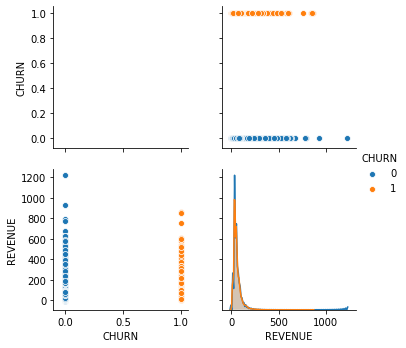

In [0]:
sns.pairplot(df1, hue='CHURN')

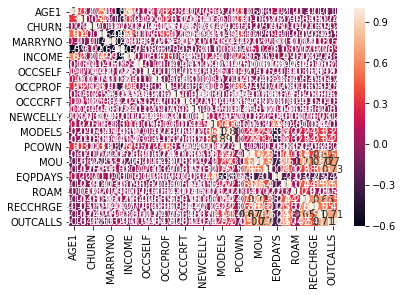

In [0]:
sns.heatmap(df.corr(), annot=True)

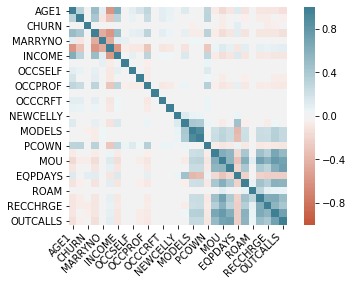

In [0]:
corr = df2.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Revenue outlier Analysis

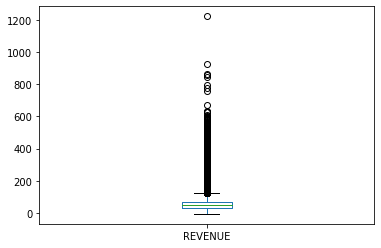

In [0]:
df.boxplot(column =['REVENUE'], grid = False) 

In [0]:
rev=df2[df2['REVENUE'].notnull()]['REVENUE']
print("arr : ",rev)  
print("5th percentile of arr : ",  
       np.percentile(rev, 5)) 
print("25th percentile of arr : ", 
       np.percentile(rev, 25)) 
print("99.7th percentile of arr : ", 
       np.percentile(rev, 99.7)) 

arr :  0         37.5100
1        191.6100
2        187.7200
3         54.6325
4         50.3000
           ...   
71042    186.7075
71043     98.7525
71044     16.9900
71045     80.1450
71046     67.7375
Name: REVENUE, Length: 71046, dtype: float64
5th percentile of arr :  15.5675
25th percentile of arr :  33.695625
99.7th percentile of arr :  317.4488625000004


In [0]:
df2.loc[df2['REVENUE'] > 317, 'REVENUE'] = 317
df2.loc[df2['REVENUE'] < 15, 'REVENUE'] = 15

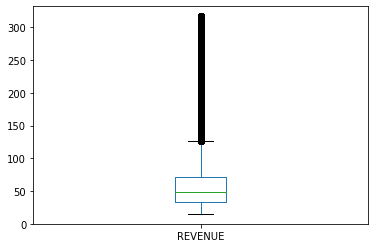

In [0]:
df2.boxplot(column =['REVENUE'], grid = False) 

#### EQPDAYS outlier analysis

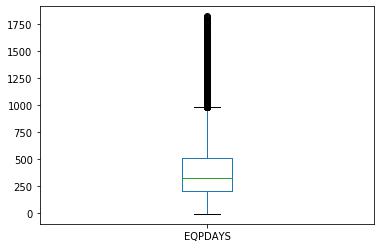

In [0]:
df2.boxplot(column =['EQPDAYS'], grid = False) 

In [0]:
df2.loc[df2['EQPDAYS'] > 1368, 'EQPDAYS'] = 1368
df2.loc[df2['ROAM'] > 46, 'ROAM'] = 46
df2.loc[df2['RECCHRGE'] > 160, 'RECCHRGE'] = 160
df2.loc[df2['PEAKVCE'] > 701, 'PEAKVCE'] = 701

##### Relation of Income against Churn

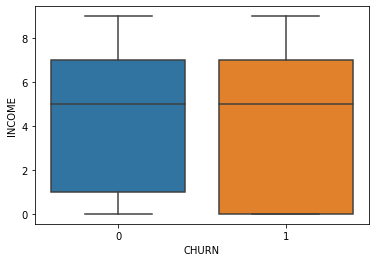

In [0]:
import seaborn as sns

sns.boxplot(x = df2.CHURN, y = df2.INCOME)

##### Relation of Marry against CHURN

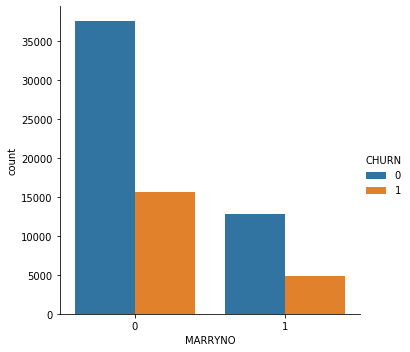

In [0]:
sns.catplot(x="MARRYNO", kind="count", hue="CHURN", data=df2,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

##### scaling data

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
scaler= preprocessing.StandardScaler()
X = df2.drop('CHURN',axis= 1)
y = df2.CHURN
X[['AGE1', 'CALLWAIT','MOU','INCALLS','EQPDAYS','DROPVCE','ROAM','REVENUE','RECCHRGE','PEAKVCE','OUTCALLS']] = scaler.fit_transform(X[['AGE1', 'CALLWAIT','MOU','INCALLS','EQPDAYS','DROPVCE','ROAM','REVENUE','RECCHRGE','PEAKVCE','OUTCALLS']])

##### splitting data into training and testing set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### Building basic ML model for Feature importance test

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
result=model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print('Accuracy using LOgistic regression model is ',np.round(accuracy_score(y_test, y_pred)*100),"%")

Accuracy using LOgistic regression model is  71.0 %


##### Featur importance

In [0]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.591447
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  CHURN   No. Observations:                49732
Model:                          Logit   Df Residuals:                    49704
Method:                           MLE   Df Model:                           27
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                 0.01739
Time:                        09:40:04   Log-Likelihood:                -29414.
converged:                       True   LL-Null:                       -29934.
Covariance Type:            nonrobust   LLR p-value:                5.031e-202
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE1          -0.0862      0.014     -5.962      0.000      -0.115      -0.058
CHILDREN       0.1041      0.027      3.904      0.000       0.052       0.156
MARRYYES      -0.7695      0.041    -18.816      0.000      -0.850      -0.689
MARRYNO       -0.7944      0.038    -20.691      0.000      -0.870      -0.719
MARRYUN       -0.7366      0.033    -22.346      0.000      -0.801      -0.672
INCOME        -0.0038      0.004     -0.863      0.388      -0.013       0.005
OCCSTUD        0.1469      0.114      1.286      0.198      -0.077       0.371
OCCSELF        0.0206      0.079      0.262      0.793      -0.133       0.175
OCCRET        -0.0555      0.090     -0.619      0.536      -0.231       0.120
OCCPROF       -0.0343      0.031     -1.114      0.265      -0.095       0.026
OCCHMKR        0.0671      0.180      0.373      0.709      -0.285       0.419
OCCCRFT       -0.0410      0.061     -0.671      0.502      -0.161       0.079
OCCCLER        0.1033      0.071      1.452      0.146      -0.036       0.243
NEWCELLY      -0.0560      0.026     -2.172      0.030      -0.107      -0.005
MONTHS        -0.0198      0.002    -11.197      0.000      -0.023      -0.016
MODELS         0.0639      0.027      2.390      0.017       0.012       0.116
PHONES         0.0649      0.017      3.816      0.000       0.032       0.098
PCOWN          0.0138      0.029      0.471      0.638      -0.044       0.071
CALLWAIT       0.0190      0.014      1.352      0.176      -0.009       0.047
MOU           -0.1447      0.021     -6.931      0.000      -0.186      -0.104
INCALLS       -0.0322      0.016     -1.965      0.049      -0.064   -8.64e-05
EQPDAYS        0.3440      0.017     20.845      0.000       0.312       0.376
DROPVCE        0.0633      0.013      4.820      0.000       0.038       0.089
ROAM           0.0249      0.010      2.481      0.013       0.005       0.045
REVENUE        0.1946      0.017     11.789      0.000       0.162       0.227
RECCHRGE      -0.1534      0.014    -11.087      0.000      -0.180      -0.126
PEAKVCE       -0.0474      0.020     -2.382      0.017      -0.086      -0.008
OUTCALLS       0.0083      0.019      0.443      0.658      -0.028       0.045
==============================================================================
"""

In [0]:
#Most important features for churn
#EQPDAYS
import math
math.exp(1.87)
#EQPDAYS her bir birim artış churn göreceli olasılığını %648 artırmaktadır.

6.488296399286712

In [0]:
#Most important features for churn
#DROPVCE
import math
math.exp(1.54)
#DROPVCE her bir birim artış churn göreceli olasılığını %466 artırmaktadır.

4.664590270988126

In [0]:
#Most important features for churn
#Revenue
import math
math.exp(1.44)
#revenuedaki her bir birim artış churn göreceli olasılığını %422 artırmaktadır.

4.220695816996552

AxesSubplot(0.125,0.125;0.775x0.755)


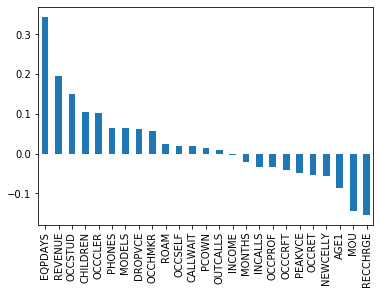

In [0]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:25].plot(kind='bar'))

##### Dropping less important features

In [0]:
Top15 = weights.sort_values(ascending = False).index[:15].values
Bottom15 = weights.sort_values(ascending = False).index[15:].values

In [0]:
Top15

array(['EQPDAYS', 'REVENUE', 'OCCSTUD', 'CHILDREN', 'OCCCLER', 'PHONES',
       'MODELS', 'DROPVCE', 'OCCHMKR', 'ROAM', 'OCCSELF', 'CALLWAIT',
       'PCOWN', 'OUTCALLS', 'INCOME'], dtype=object)

In [0]:
Bottom15

array(['MONTHS', 'INCALLS', 'OCCPROF', 'OCCCRFT', 'PEAKVCE', 'OCCRET',
       'NEWCELLY', 'AGE1', 'MOU', 'RECCHRGE', 'MARRYUN', 'MARRYYES',
       'MARRYNO'], dtype=object)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train,y_train)
print(model.feature_importances_)

[0.05437637 0.01306741 0.00530614 0.00504283 0.00462115 0.05041769
 0.00236558 0.00420507 0.0031224  0.01078729 0.00133547 0.00582723
 0.0048736  0.0132512  0.07447155 0.02341094 0.03110107 0.01472858
 0.04954245 0.07778485 0.06007293 0.08763873 0.06806963 0.05062096
 0.07382181 0.07134835 0.07128872 0.0675    ]


### Random Forest Classifer

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
print('Accuracy using Random forest Classfier is ',np.round(accuracy_score(y_test, y_pred_rf)*100),"%")

Accuracy using Random forest Classfier is  69.0 %


### Deep Learning Classifier (Keras Sequential Classifier)

In [0]:
X_train.shape[1]

28

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dropout(rate=0.2))
model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train,epochs=20)
y_pred_dl = model.predict_classes(X_test)





Epoch 1/20





49732/49732 [==============================] - 3s 62us/step - loss: 0.5978 - acc: 0.7103
Epoch 2/20
49732/49732 [==============================] - 2s 43us/step - loss: 0.5904 - acc: 0.7103
Epoch 3/20
49732/49732 [==============================] - 2s 44us/step - loss: 0.5879 - acc: 0.7102
Epoch 4/20
49732/49732 [==============================] - 2s 45us/step - loss: 0.5864 - acc: 0.7103
Epoch 5/20
49732/49732 [==============================] - 2s 43us/step - loss: 0.5853 - acc: 0.7103
Epoch 6/20
49732/49732 [==============================] - 2s 43us/step - loss: 0.5848 - acc: 0.7102
Epoch 7/20
49732/49732 [==============================] - 2s 43us/step - loss: 0.5843 - acc: 0.7102
Epoch 8/20
49732/49732 [==============================] - 2s 44us/step - loss: 0.5837 - acc: 0.7103
Epoch 9/20
49732/49732 [==============================] - 2s 43us/step - loss: 0.5832 - acc: 0.7105
Epoch 10/20
49732/49732 [==============================] - 2s 43us/step - loss: 0.5828 - acc

In [0]:
print('Accuracy using Deep Learning model is',np.round(accuracy_score(y_test, y_pred_dl)*100),"%")

Accuracy using Deep Learning model is 71.0 %
